# Checking the climate model
We found two simulated mega-floods, that largely deviated from what can be expected from the observed record. From 2000 years of present climate simulations, they occurred on:

Megaflood one:
Year: 2037
Start: 13
Ensemble: 13

Megaflood two:
Year: 2035
Start: 14
Ensemble: 21

Here we will perform a first analysis to figure out what happened in these two cases. 


In [1]:
##Load pacakages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs


In [2]:
##This is so variables get printed within jupyter
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

Here I will load the Precipitation, 2 meter air temperature (tas), sea surface temperature (tos) and the z500 for the two mega floods.

In [3]:
dirname = r'/home/tike/Ec_data/'
Start_flood1=13
Start_flood2=14
Year_flood1=2037
Year_flood2=2035
Ensemble_flood1=13
Ensemble_flood2=21

In [4]:
def import_flood(variable):
    if  type(variable) is not str:
        raise NameError("variable needs to be a string")
        
    Var_flood1 = xr.open_dataset(dirname + variable + '/S' + '%02d' % Start_flood1 + '/' + variable + '_m_ECEarth_PD_s' + '%02d' % Start_flood1 + 'r'  + '%02d' % Ensemble_flood1 + '_' + '%04d' %Year_flood1 + '.nc')
    Var_flood2 = xr.open_dataset(dirname + variable + '/S' + '%02d' % Start_flood2 + '/' + variable + '_m_ECEarth_PD_s' + '%02d' % Start_flood2 + 'r'  + '%02d' % Ensemble_flood2 + '_' + '%04d' %Year_flood2 + '.nc')
    return(Var_flood1,Var_flood2)

In [5]:
PR_flood1,PR_flood2=import_flood('pr')
Pr_Monthly = xr.open_dataset(dirname+'Processed/pr_monthly.nc')

In [6]:
def process_precip(PR_flood):
    PR_flood = PR_flood.assign_coords(time=np.arange(1,13))
    PR_flood_attrs=PR_flood['pr'].attrs
    PR_flood=PR_flood['pr']*1000
    PR_flood.attrs=PR_flood_attrs
    PR_flood.attrs['units']= 'mm'
    PR_flood=PR_flood.rename({'time': 'month'})
    return(PR_flood)

PR_flood1 = process_precip(PR_flood1)
PR_flood2 = process_precip(PR_flood2)

In [7]:
# PR_flood1
# PR_flood2

In [8]:
Pr_anomaly1 = PR_flood1-Pr_Monthly['pr_avg']
Pr_standardized_anomaly1 = (PR_flood1-Pr_Monthly['pr_avg'])/Pr_Monthly['sd']

Pr_anomaly2 = PR_flood2-Pr_Monthly['pr_avg']
Pr_standardized_anomaly2 = (PR_flood2-Pr_Monthly['pr_avg'])/Pr_Monthly['sd']


In [9]:
# PR_flood1

## 1.1 Precipitation for the first flood

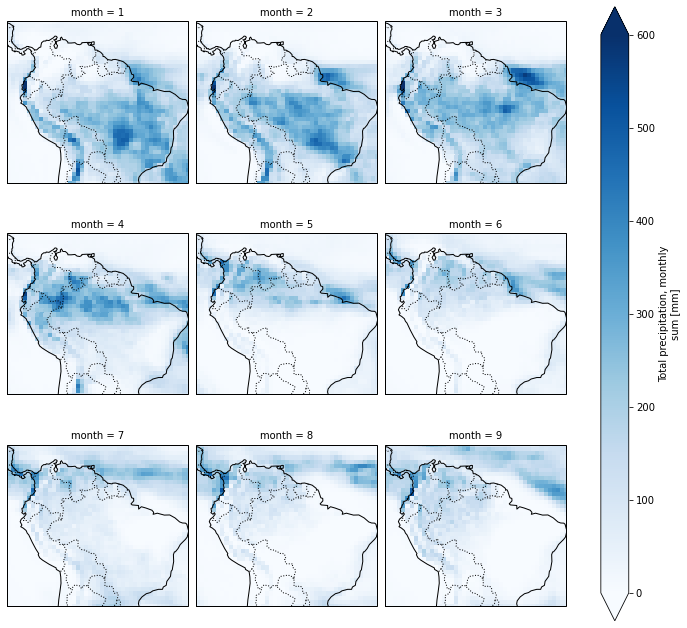

In [9]:
extent = [-85, -35, 15, -25]

g_simple=PR_flood1.isel(month=slice(0,9)).plot(transform=ccrs.PlateCarree(),cmap=plt.cm.Blues,vmax=600,vmin=0,  col='month', col_wrap=3,subplot_kws={'projection': ccrs.Mercator()})  #

for ax in g_simple.axes.flat:
    ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    
plt.draw()

# for i, ax in enumerate(g_simple.axes.flat):
#     print(ax)
#     ax.set_title('Air Temperature %d' % i)
    
# plt.savefig('../Graphs/Pr_Flood1.png',dpi =300)

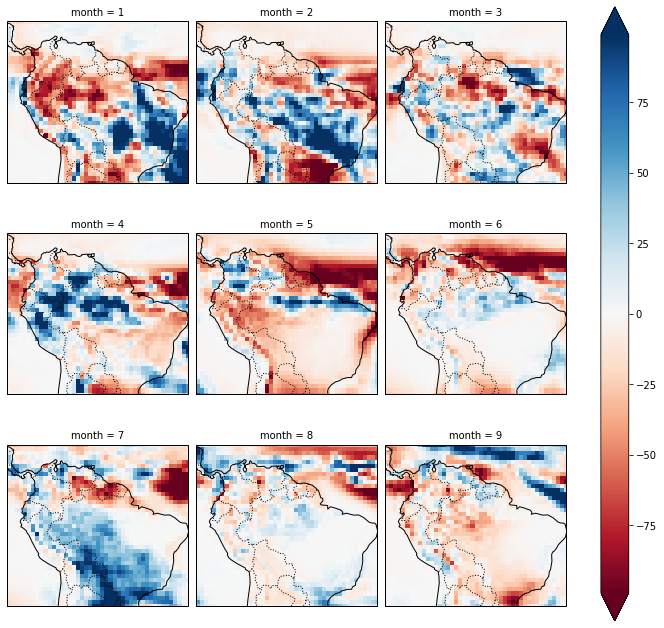

In [10]:
#Plot the anomaly
g_simple=Pr_anomaly1.isel(month=slice(0,9)).plot(transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu,robust=True,  col='month', col_wrap=3,subplot_kws={'projection': ccrs.Mercator()})  #,cmap=plt.cm.Blues,vmax=0.6,vmin=0
# .isel(month=slice(0,6))
for ax in g_simple.axes.flat:
    ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    
plt.draw()

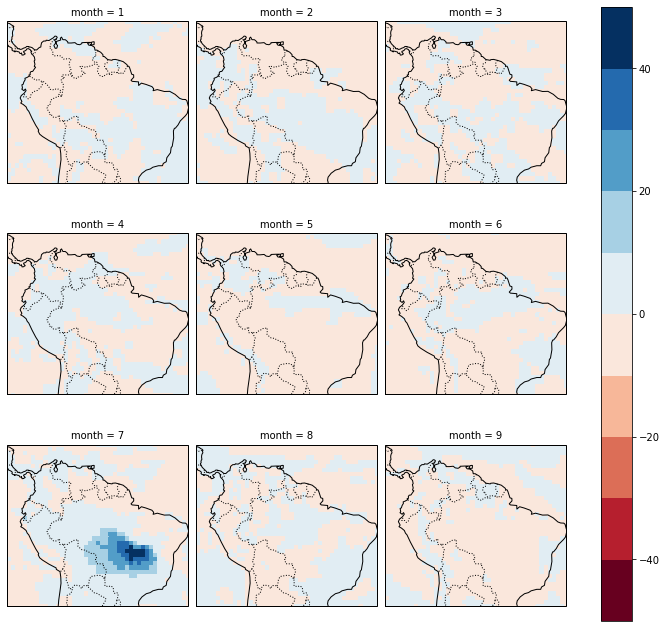

In [12]:
## And the standardized anomaly
g_simple=Pr_standardized_anomaly1.isel(month=slice(0,9)).plot(transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu,levels=11,col='month', col_wrap=3,subplot_kws={'projection': ccrs.Mercator()})  #,cmap=plt.cm.Blues,

for ax in g_simple.axes.flat:
    ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    
plt.draw()
plt.savefig('../Graphs/Pr_Flood1_standardized_wow.png',dpi =300)

## 1.2 Precipitation for the second flood

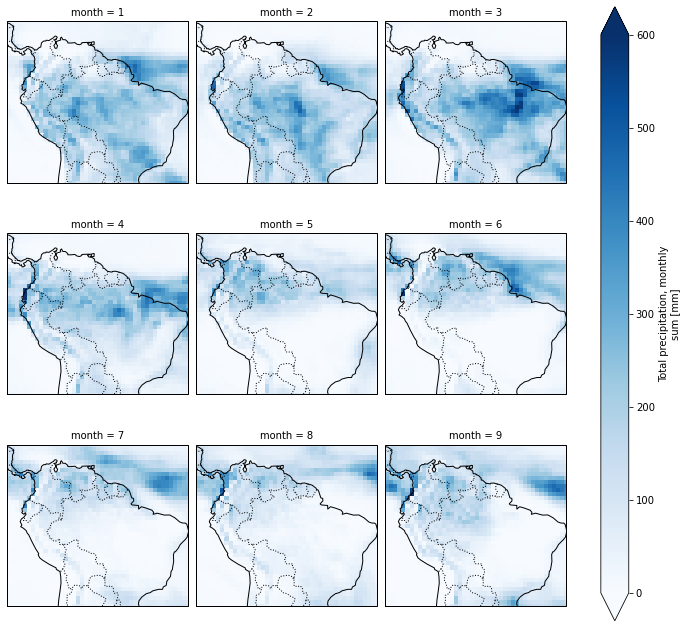

In [142]:
extent = [-85, -35, 15, -25]

g_simple=PR_flood2.isel(month=slice(0,9)).plot(transform=ccrs.PlateCarree(),cmap=plt.cm.Blues,vmax=600,vmin=0,  col='month', col_wrap=3,subplot_kws={'projection': ccrs.Mercator()})  #

for ax in g_simple.axes.flat:
    ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    
plt.draw()

# for i, ax in enumerate(g_simple.axes.flat):
#     print(ax)
#     ax.set_title('Air Temperature %d' % i)
    
plt.savefig('../Graphs/Pr_Flood2.png',dpi =300)

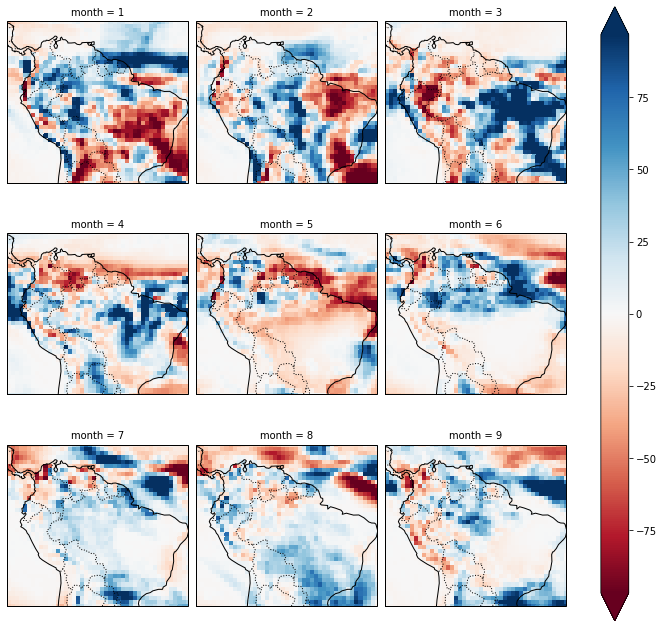

In [68]:
#Plot the anomaly
g_simple=Pr_anomaly2.isel(month=slice(0,9)).plot(transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu,robust=True,  col='month', col_wrap=3,subplot_kws={'projection': ccrs.Mercator()})  #,cmap=plt.cm.Blues,vmax=0.6,vmin=0
# .isel(month=slice(0,6))
for ax in g_simple.axes.flat:
    ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    
plt.draw()

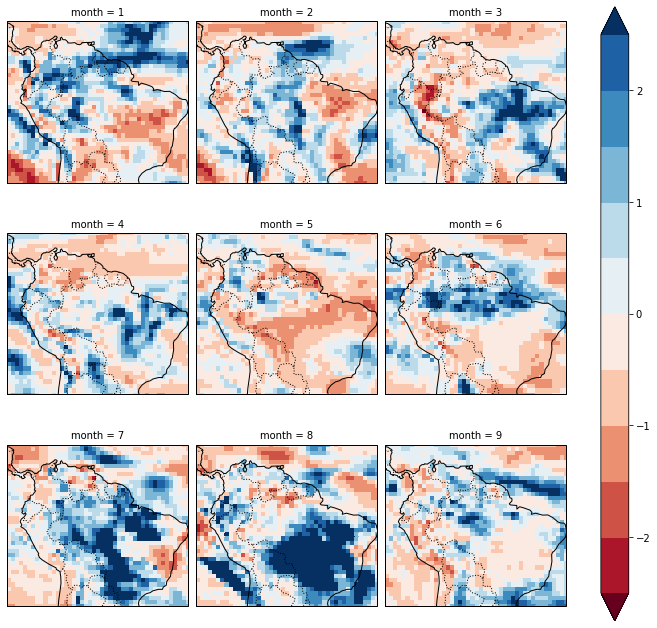

In [143]:
## And the standardized anomaly
g_simple=Pr_standardized_anomaly2.isel(month=slice(0,9)).plot(transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu,levels=11, robust=True, col='month', col_wrap=3,subplot_kws={'projection': ccrs.Mercator()})  #,cmap=plt.cm.Blues,

for ax in g_simple.axes.flat:
    ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    
plt.draw()
plt.savefig('../Graphs/Pr_Flood2_standardized.png',dpi =300)

## 2.1 SST for the first flood


The SST file cannot decode the time upon importing, so I adapt the import function:

In [78]:
def import_flood(variable):
    if  type(variable) is not str:
        raise NameError("variable needs to be a string")
        
    Var_flood1 = xr.open_dataset(dirname + variable + '/S' + '%02d' % Start_flood1 + '/' + variable + '_m_ECEarth_PD_s' + '%02d' % Start_flood1 + 'r'  + '%02d' % Ensemble_flood1 + '_' + '%04d' %Year_flood1 + '.nc',decode_times=False)
    Var_flood2 = xr.open_dataset(dirname + variable + '/S' + '%02d' % Start_flood2 + '/' + variable + '_m_ECEarth_PD_s' + '%02d' % Start_flood2 + 'r'  + '%02d' % Ensemble_flood2 + '_' + '%04d' %Year_flood2 + '.nc',decode_times=False)
    Var_flood1 = Var_flood1.assign_coords(time=np.arange(1,13)).rename({'time': 'month'})
    Var_flood2 = Var_flood2.assign_coords(time=np.arange(1,13)).rename({'time': 'month'})
    
    return(Var_flood1,Var_flood2)

In [79]:
SST_flood1,SST_flood2=import_flood('tos')
SST_Monthly = xr.open_dataset(dirname+'Processed/sst_monthly.nc')

In [80]:
SST_anomaly1 = SST_flood1-SST_Monthly['tos_avg']
SST_standardized_anomaly1 = (SST_flood1-SST_Monthly['tos_avg'])/SST_Monthly['sd']

SST_anomaly2 = SST_flood2-SST_Monthly['tos_avg']
SST_standardized_anomaly2 = (SST_flood2-SST_Monthly['tos_avg'])/SST_Monthly['sd']


In [85]:
# SST_flood1
# SST_anomaly1
# SST_standardized_anomaly1

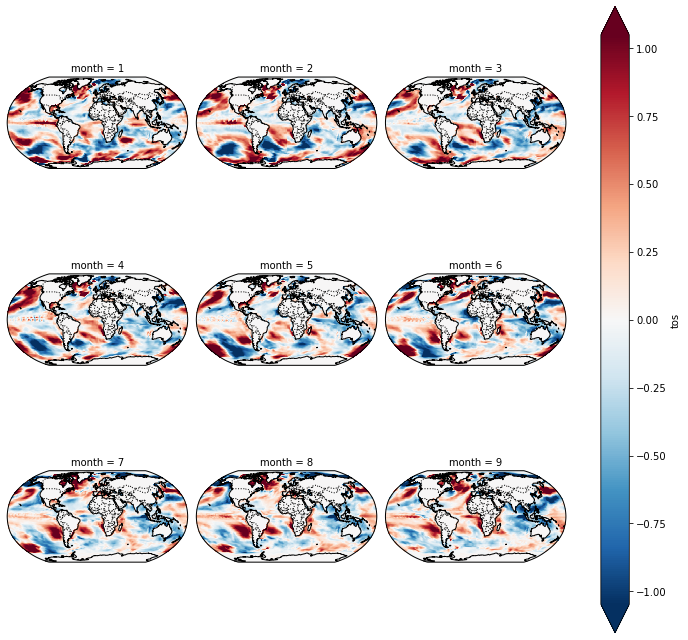

In [136]:
# extent = [-85, -35, 15, -25]

g_simple=SST_anomaly1['tos'].sel(month=slice(1,9)).plot(transform=ccrs.PlateCarree(), robust=True, col='month', col_wrap=3,subplot_kws={'projection': ccrs.Robinson()})  #

for ax in g_simple.axes.flat:
#     ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    
plt.draw()

plt.savefig('../Graphs/SST_Flood1.png',dpi =300)

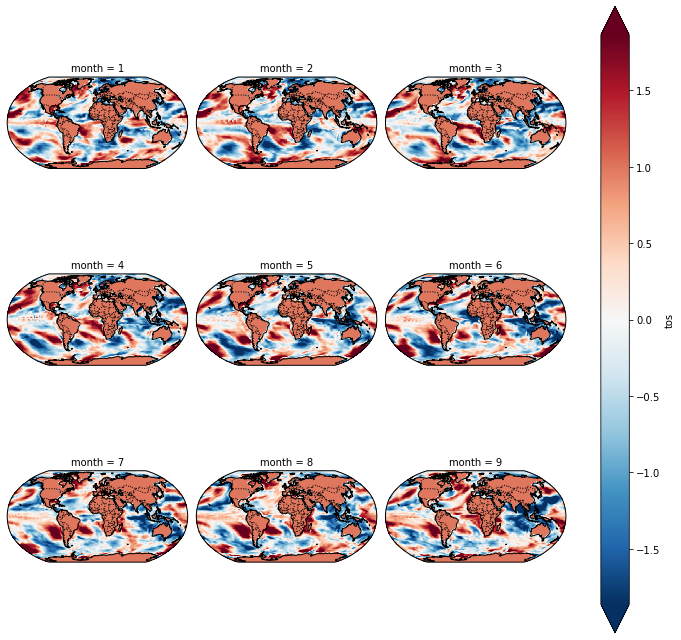

In [137]:
# extent = [-85, -35, 15, -25]

g_simple=SST_standardized_anomaly1['tos'].sel(month=slice(1,9)).plot(transform=ccrs.PlateCarree(), robust=True, col='month', col_wrap=3,subplot_kws={'projection': ccrs.Robinson()})  #

for ax in g_simple.axes.flat:
#     ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    
plt.draw()
plt.savefig('../Graphs/SST_Flood1_standardized.png',dpi =300)

## 2.2 SST flood 2
Repeat for the second flood

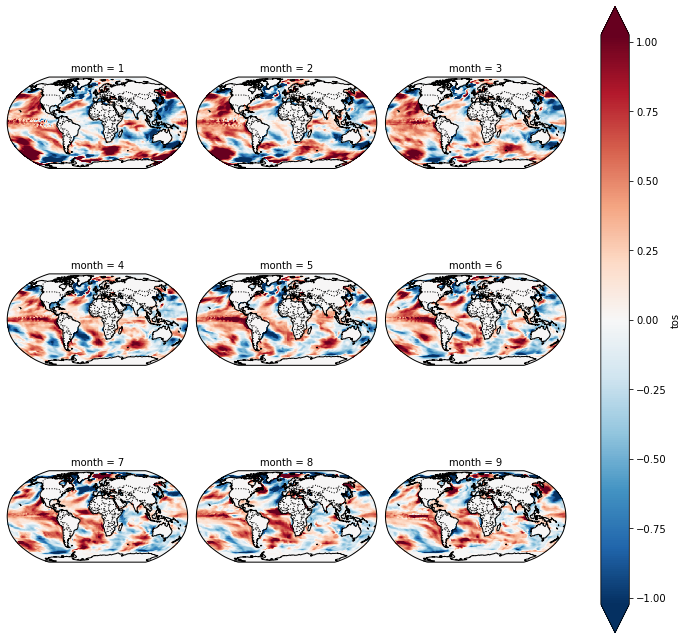

In [138]:
# extent = [-85, -35, 15, -25]

g_simple=SST_anomaly2['tos'].sel(month=slice(1,9)).plot(transform=ccrs.PlateCarree(), robust=True, col='month', col_wrap=3,subplot_kws={'projection': ccrs.Robinson()})  #

for ax in g_simple.axes.flat:
#     ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    
plt.draw()
plt.savefig('../Graphs/SST_Flood2.png',dpi =300)

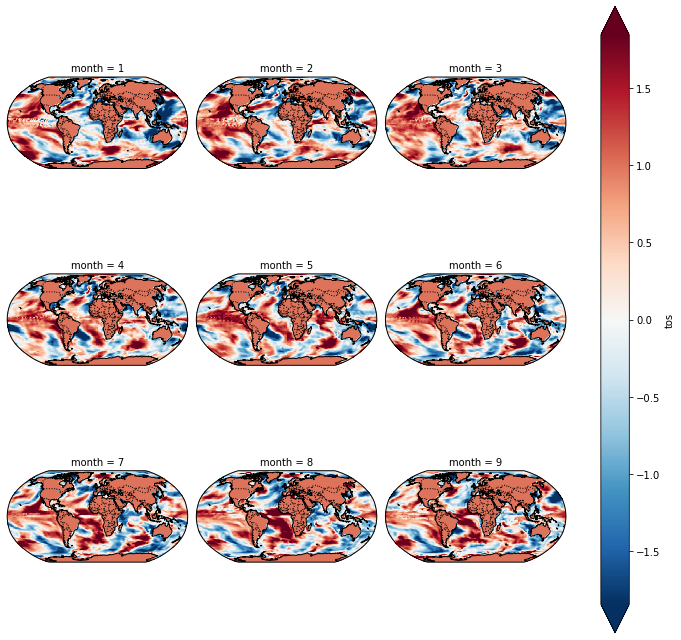

In [139]:
# extent = [-85, -35, 15, -25]

g_simple=SST_standardized_anomaly2['tos'].sel(month=slice(1,9)).plot(transform=ccrs.PlateCarree(), robust=True, col='month', col_wrap=3,subplot_kws={'projection': ccrs.Robinson()})  #

for ax in g_simple.axes.flat:
#     ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    
plt.draw()
plt.savefig('../Graphs/SST_Flood2_standardized.png',dpi =300)

## 3.1 Circulation patterns for the first flood

In [117]:
Z500_flood1,Z500_flood2=import_flood('z500')
Z500_Monthly = xr.open_dataset(dirname+'Processed/z500_monthly.nc')

In [118]:
Z500_anomaly1 = Z500_flood1-Z500_Monthly['z500_avg']
Z500_standardized_anomaly1 = (Z500_flood1-Z500_Monthly['z500_avg'])/Z500_Monthly['sd']

Z500_anomaly2 = Z500_flood2-Z500_Monthly['z500_avg']
Z500_standardized_anomaly2 = (Z500_flood2-Z500_Monthly['z500_avg'])/Z500_Monthly['sd']


In [119]:
Var_flood_attrs=Z500_flood1['z500'].attrs
def Process_z500(Var_flood):
    Var_flood=Var_flood['z500'] / 9.81
    Var_flood.attrs=Var_flood_attrs
    Var_flood.attrs['units']= 'm'
    return(Var_flood)

In [120]:
# Z500_flood1
# Z500_anomaly1
# Z500_standardized_anomaly1

In [121]:
Z500_flood1 = Process_z500(Z500_flood1)
Z500_anomaly1 = Process_z500(Z500_anomaly1)
Z500_standardized_anomaly1.attrs=Var_flood_attrs
Z500_standardized_anomaly1.attrs['units']= ''

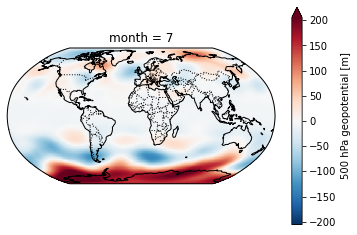

In [124]:
map_proj = ccrs.Robinson()

extent = [4, 15, 57, 70]

# plt.figure(figsize=(4, 9))
ax = plt.axes(projection=map_proj)
# ax.set_extent(extent_zoom2)
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
# ax.gridlines(draw=True)
Z500_anomaly1.sel(month=7).plot(transform=ccrs.PlateCarree(), robust=True,ax=ax)

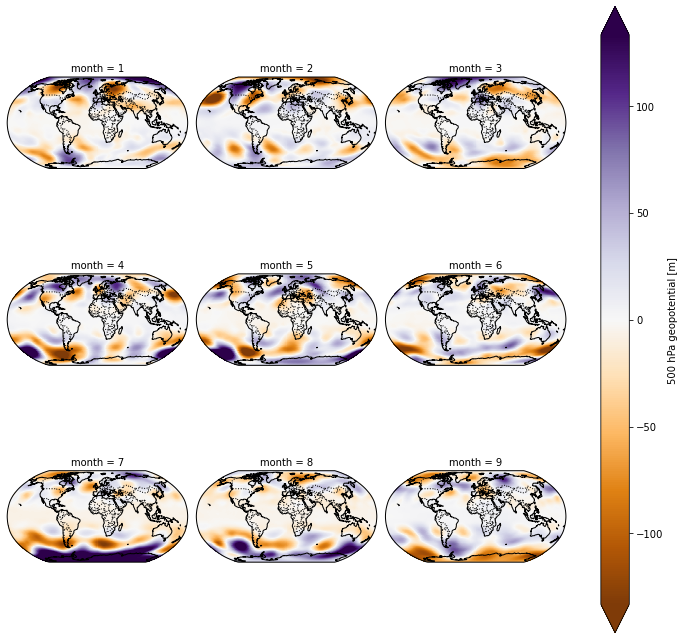

In [230]:
# extent = [-85, -35, 15, -25]

g_simple=Z500_anomaly1.sel(month=slice(1,9)).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr,robust=True, col='month', col_wrap=3,subplot_kws={'projection': ccrs.Robinson()})  #

for ax in g_simple.axes.flat:
#     ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    

plt.draw()
plt.savefig('../Graphs/Z500_Flood1.png',dpi =300)

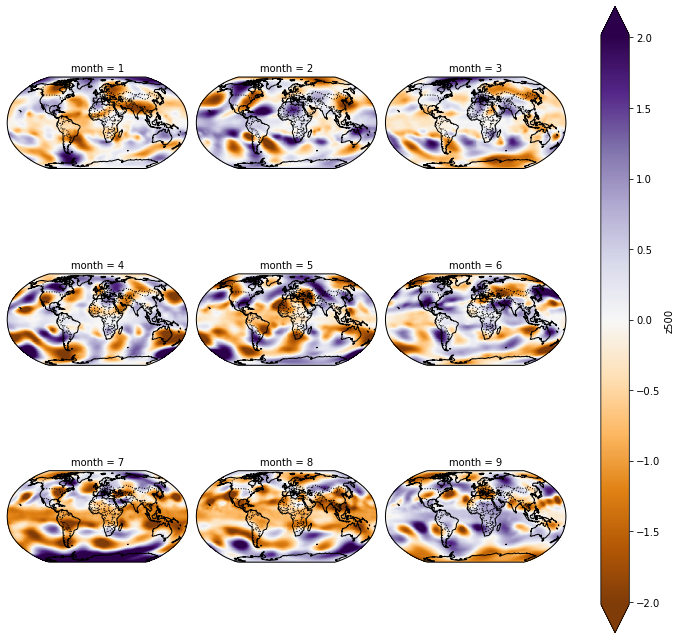

In [231]:
# extent = [-85, -35, 15, -25]

g_simple=Z500_standardized_anomaly1['z500'].sel(month=slice(1,9)).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr,robust=True, col='month', col_wrap=3,subplot_kws={'projection': ccrs.Robinson()})  #

for ax in g_simple.axes.flat:
#     ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    
plt.draw()
plt.savefig('../Graphs/Z500_Flood1_standardized.png',dpi =300)

## 3.2 Z500 flood 2

In [127]:
Z500_flood2 = Process_z500(Z500_flood2)
Z500_anomaly2 = Process_z500(Z500_anomaly2)
Z500_standardized_anomaly2.attrs=Var_flood_attrs
Z500_standardized_anomaly2.attrs['units']= ''

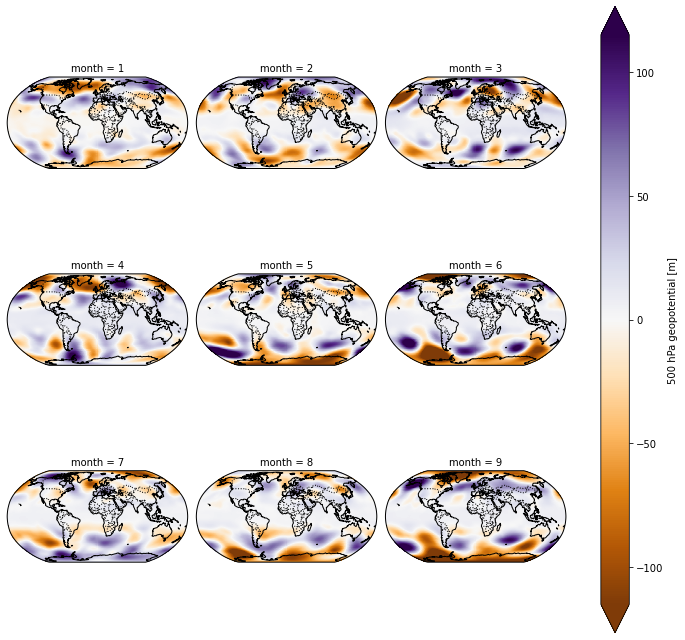

In [181]:
# extent = [-85, -35, 15, -25]

g_simple=Z500_anomaly2.sel(month=slice(1,9)).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr,robust=True, col='month', col_wrap=3,subplot_kws={'projection': ccrs.Robinson()})  #

for ax in g_simple.axes.flat:
#     ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    
plt.draw()
plt.savefig('../Graphs/Z500_Flood2.png',dpi =300)

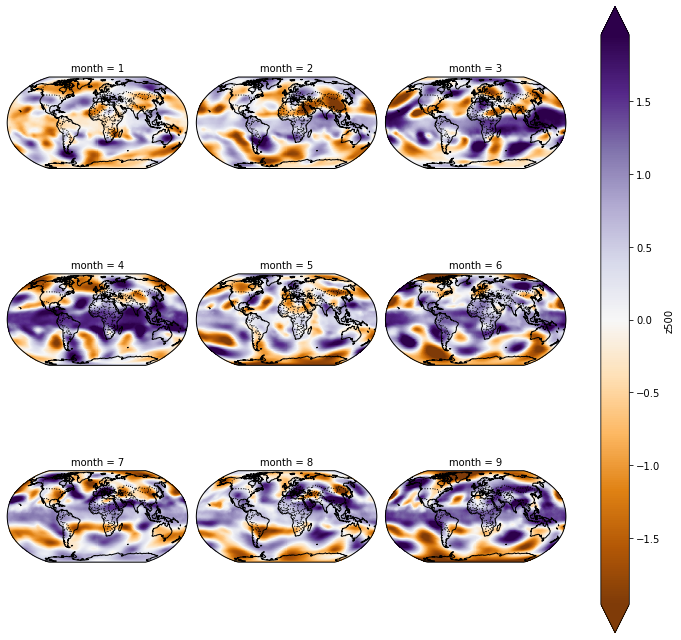

In [182]:
# extent = [-85, -35, 15, -25]

g_simple=Z500_standardized_anomaly2['z500'].sel(month=slice(1,9)).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr,robust=True, col='month', col_wrap=3,subplot_kws={'projection': ccrs.Robinson()})  #

for ax in g_simple.axes.flat:
#     ax.set_extent(extent)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.gridlines()
    
plt.draw()
plt.savefig('../Graphs/Z500_Flood2_standardized.png',dpi =300)

## Zoom in on the Z500

When zooming in on South America, which projection to use?

I used Mercator before for the Amazon, but when zooming out a bit more that looks really odd. I first try PlateCarree and then I tried AlbersEqualArea and LambertConformal. I decided to go with the latter.

<a list of 18 text.Text objects>

<a list of 19 text.Text objects>

<a list of 21 text.Text objects>

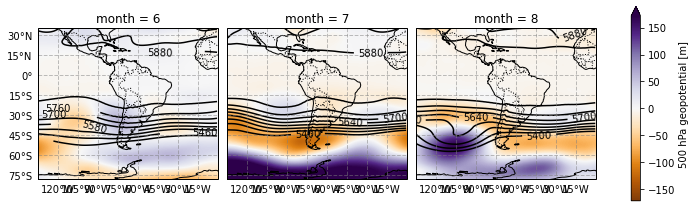

In [217]:
##Plots with PlateCarree
g_simple=Z500_anomaly1.sel(month=slice(6,8)).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr,robust=True, col='month', col_wrap=3,subplot_kws={'projection': ccrs.PlateCarree()})  #
for i, ax in enumerate(g_simple.axes.flat):
    contours=Z500_flood1.sel(month=6+i).plot.contour(levels=range(5400, 6000, 60), add_labels =True,transform=ccrs.PlateCarree(), colors = 'black',ax=ax)
    plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
#     ax.set_title('Air Temperature %d' % i)
    ax.set_extent(extent_z500)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    
    gl=ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    if i > 0:
        gl.ylabels_left = False
    # gl.xlocator = cartopy.mpl.gridliner.mticker.FixedLocator([-120, -90, -60, -30])
    # gl.ylocator = mticker.FixedLocator([-60, 20, 40, 60])
    gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
    gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

<a list of 21 text.Text objects>

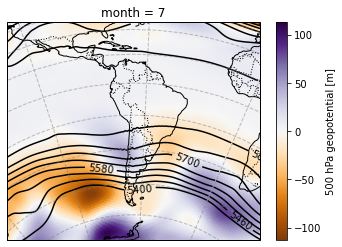

<a list of 22 text.Text objects>

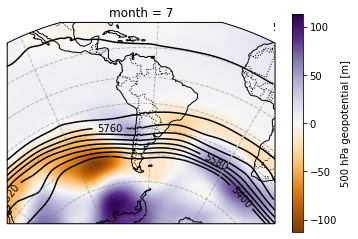

In [215]:
##Comparing AlbersEqualArea and LambertConformal

extent_z500 = [-135, 0, 15, -60]

central_lon = np.mean(extent_z500[:2])
central_lat = np.mean(extent_z500[2:])

map_proj = ccrs.AlbersEqualArea(central_lon, central_lat,standard_parallels=(-60.0, 10.0))

# map_proj = ccrs.LambertConformal(central_lon, central_lat,standard_parallels=(-60.0, 10.0),cutoff =30)



# plt.figure(figsize=(4, 9))
ax = plt.axes(projection=map_proj)
ax.set_extent(extent_z500)
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
# ax.gridlines(draw=True)
# Z500_anomaly2.sel(month=7).plot(transform=ccrs.PlateCarree(), robust=True,ax=ax)
Z500_anomaly2.sel(month=7).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr, ax=ax)
contours=Z500_flood2.sel(month=7).plot.contour(levels=range(5400, 6000, 60), add_labels =True,transform=ccrs.PlateCarree(), colors = 'black',ax=ax)
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
gl=ax.gridlines(draw_labels=False, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlocator = cartopy.mpl.gridliner.mticker.FixedLocator([-120, -90, -60, -30])
# gl.ylocator = mticker.FixedLocator([-60, 20, 40, 60])
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
plt.show()



map_proj = ccrs.LambertConformal(central_lon, central_lat,standard_parallels=(-60.0, 10.0),cutoff =30)
ax = plt.axes(projection=map_proj)
ax.set_extent(extent_z500)
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

Z500_anomaly2.sel(month=7).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr, ax=ax)
contours=Z500_flood2.sel(month=7).plot.contour(levels=range(5400, 6000, 60), add_labels =True,transform=ccrs.PlateCarree(), colors = 'black',ax=ax)
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
gl=ax.gridlines(draw_labels=False, linewidth=1, color='gray', alpha=0.5, linestyle='--')


## Zoom in flood 1

<a list of 25 text.Text objects>

<a list of 29 text.Text objects>

<a list of 24 text.Text objects>

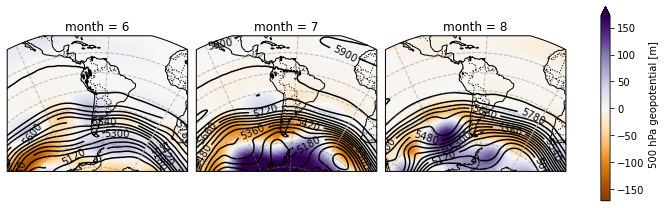

In [232]:
extent_z500 = [-135, 0, 15, -60]

central_lon = np.mean(extent_z500[:2])
central_lat = np.mean(extent_z500[2:])

map_proj = ccrs.LambertConformal(central_lon, central_lat,standard_parallels=(-60.0, 10.0),cutoff =30)

g_simple=Z500_anomaly1.sel(month=slice(6,8)).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr,robust=True, col='month', col_wrap=3,subplot_kws={'projection': map_proj})  #
for i, ax in enumerate(g_simple.axes.flat):
    contours=Z500_flood1.sel(month=6+i).plot.contour(levels=range(5000, 6000, 60), add_labels =True,transform=ccrs.PlateCarree(), colors = 'black',ax=ax)
    plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
#     ax.set_title('Air Temperature %d' % i)
    ax.set_extent(extent_z500)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    
    gl=ax.gridlines(draw_labels=False, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    
plt.draw()
plt.savefig('../Graphs/Z500_Flood1_zoomed.png',dpi =300)

## Zoom in flood 2

<a list of 26 text.Text objects>

<a list of 31 text.Text objects>

<a list of 27 text.Text objects>

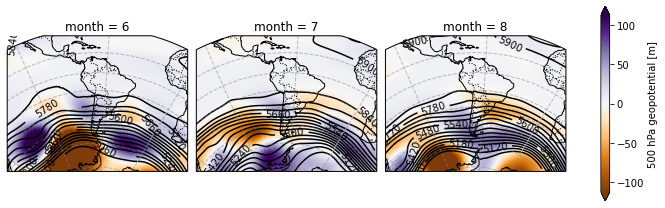

In [229]:
extent_z500 = [-135, 0, 15, -60]

central_lon = np.mean(extent_z500[:2])
central_lat = np.mean(extent_z500[2:])

map_proj = ccrs.LambertConformal(central_lon, central_lat,standard_parallels=(-60.0, 10.0),cutoff =30)

g_simple=Z500_anomaly2.sel(month=slice(6,8)).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr,robust=True, col='month', col_wrap=3,subplot_kws={'projection': map_proj})  #
for i, ax in enumerate(g_simple.axes.flat):
    contours=Z500_flood2.sel(month=6+i).plot.contour(levels=range(5000, 6000, 60), add_labels =True,transform=ccrs.PlateCarree(), colors = 'black',ax=ax)
    plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
#     ax.set_title('Air Temperature %d' % i)
    ax.set_extent(extent_z500)
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    
    gl=ax.gridlines(draw_labels=False, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    
plt.draw()
plt.savefig('../Graphs/Z500_Flood2_zoomed.png',dpi =300)

## Older stuff

<a list of 21 text.Text objects>

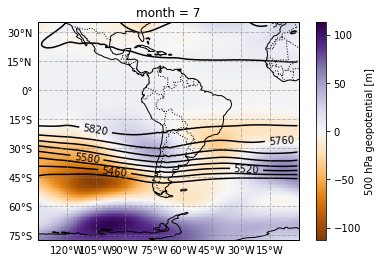

In [186]:
map_proj = ccrs.PlateCarree()

extent_z500 = [-135, 0, 15, -60]

# plt.figure(figsize=(4, 9))
ax = plt.axes(projection=map_proj)
ax.set_extent(extent_z500)
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
# ax.gridlines(draw=True)
# Z500_anomaly2.sel(month=7).plot(transform=ccrs.PlateCarree(), robust=True,ax=ax)
Z500_anomaly2.sel(month=7).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr, ax=ax)
contours=Z500_flood2.sel(month=7).plot.contour(levels=range(5400, 6000, 60), add_labels =True,transform=ccrs.PlateCarree(), colors = 'black',ax=ax)
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
gl=ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlocator = cartopy.mpl.gridliner.mticker.FixedLocator([-120, -90, -60, -30])
# gl.ylocator = mticker.FixedLocator([-60, 20, 40, 60])
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

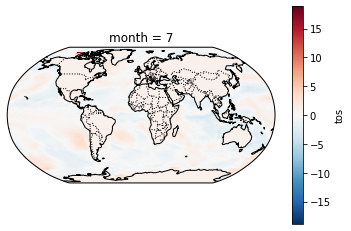

In [84]:
map_proj = ccrs.Robinson()

extent = [4, 15, 57, 70]

# plt.figure(figsize=(4, 9))
ax = plt.axes(projection=map_proj)
# ax.set_extent(extent_zoom2)
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
# ax.gridlines(draw=True)
SST_standardized_anomaly1['tos'].sel(month=7).plot(transform=ccrs.PlateCarree(), ax=ax)

In [20]:
##Spatial domain of the Amazon basin
lats = [5, -17]
lons = [-80+360, -45+360]#[100, 135]

## We cut out the Amazon region
Pr_Amazon=Pr.sel(lon=slice(lons[0], lons[1]),lat=slice(lats[0], lats[1]))

# Pr_Amazon['pr'].isel(time=0).plot()

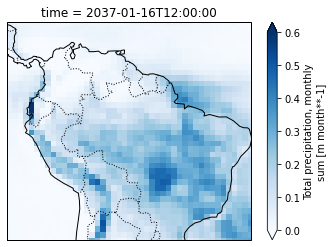

In [7]:
map_proj = ccrs.Mercator()

extent = [-85, -35, 15, -25]
# extent_zoom = [4, 10, 58, 65]

# plt.figure(figsize=(4, 9))
ax = plt.axes(projection=map_proj)
ax.set_extent(extent)
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
# ax.gridlines(draw_labels=True)
# Pr_Amazon['pr'].isel(time=0).plot(transform=ccrs.PlateCarree(), ax=ax)
Pr['pr'].isel(time=0).plot(cmap=plt.cm.Blues,vmax=0.6,vmin=0,transform=ccrs.PlateCarree(), ax=ax)
# plt.tight_layout()
plt.show()
# plt.savefig(r'C:\Users\Timo\OneDrive - Loughborough University\PhD\papers\Timo\TWEX\Topo_WC.png')


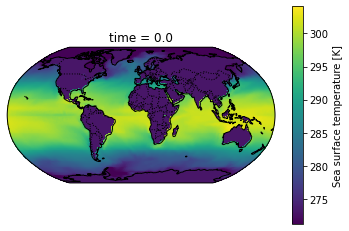

In [106]:
map_proj = ccrs.Robinson()
# crs_proj4 = map_proj.proj4_init
# Flam_proj = Flam.to_crs(crs_proj4)


extent = [4, 15, 57, 70]
extent_zoom = [4, 10, 58, 65]
extent_zoom2 = [5, 8, 60, 61]



# plt.figure(figsize=(4, 9))
ax = plt.axes(projection=map_proj)
# ax.set_extent(extent_zoom2)
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
# ax.gridlines(draw=True)
# Roy_proj.plot(ax = ax,alpha=0.5, color='black')
# Norway.bedrock.plot.pcolormesh(
#     cmap=cmocean.cm.topo, cbar_kwargs=dict(pad=0.01, aspect=30),transform=ccrs.PlateCarree(), ax=ax,zorder=-1
# )
SST['tos'].isel(time=0).plot(transform=ccrs.PlateCarree(), ax=ax)
# plt.tight_layout()
# plt.show()
# plt.savefig(r'C:\Users\Timo\OneDrive - Loughborough University\PhD\papers\Timo\TWEX\Topo_WC.png')